# mnist, cifar-10 데이터 구조 살펴보기

In [ ]:
# 데이터 다운받기
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

# 함수의 Default Parameter

In [ ]:
def add(a, b) :
    return a + b

print(add(2, 3))
print(add())
print(add(2))

In [ ]:
def subtract(a, b=3) :
    return a - b

print(subtract(5))
print(subtract(10, 20))

In [ ]:
def subtract(a, b=3) :
    return a - b

print(subtract(b=20, a=10))

In [ ]:
def add(a=2, b=3) :
    return a + b

print(add())
print(add(5))
print(add(10, 20))

# CNN 모델 개발

https://www.tensorflow.org/api_docs/python/tf  
> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D  
> https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D

```
tf.keras.layers.Conv2D(
    filters, # 필터 개수
    kernel_size, # 커널 크기, 3 혹은 (3, 3)
    strides=(1, 1),  # 보폭
    padding='valid', # 패딩(valid, same 등)
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None, # 활성화 함수
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), # 풀링 필터 사이즈
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs
)
```

# LeNet-5
> LeNet는 이미지 분류용 CNN 중에 조상격으로 CNN초기에 CNN의 기본 구조를 잘 정립  
> LeNet의 다양한 버전들(LeNet-1, LeNet-2,...)이 있으나 최종 버전은 LeNet-5  
> LeNet은 CNN을 처음으로 개발한 얀 르쿤(Yann Lecun) 연구팀이 1998년에 개발한 CNN 알고리즘  
> original 논문 제목은 "Gradient-based learning applied to document recognition"

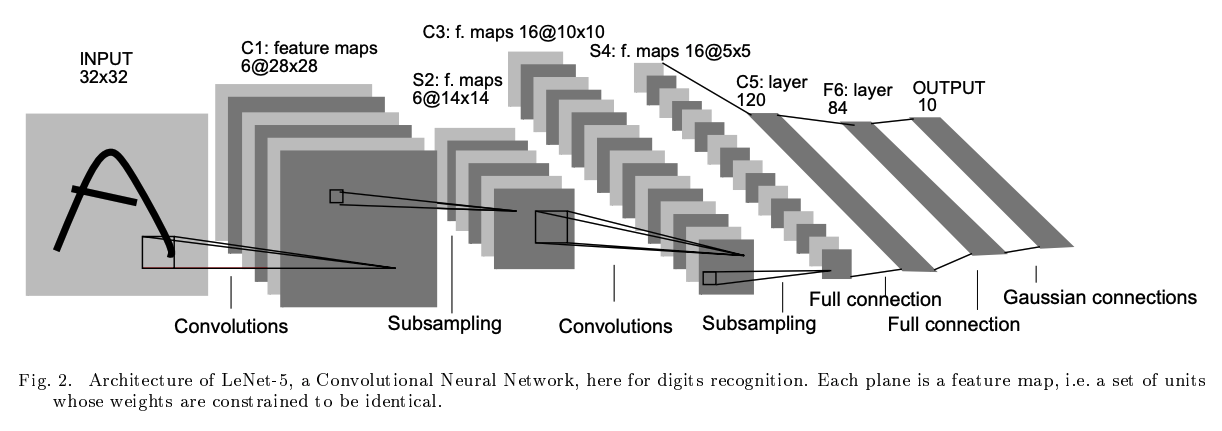

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
import pandas as pd

# 데이터 다운받기
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# 데이터 전처리
train_x = train_x.reshape(60000, 28, 28, 1)   # 3차원 이미지를 넣어야 함. (60000, 28, 28) --> (60000, 28, 28, 1)
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=??????????????))           # Conv2D에 3차원 이미지를 넣어야 함

# C1-layer
# 입력 이미지(여기서는 28 x 28)를 6개(6채널)의 5 x 5 필터(커널)와 컨볼루션 연산을 해줌.
# 그 결과 6장의 24 x 24 특성 맵(Feature map)을 얻게 됨.
model.add(Conv2D(??, kernel_size=(??, ??), activation='relu', name='C1-layer'))    # 필터 사이즈, 커널 사이즈(튜플),

# S2-layer
# 6장의 24 x 24 특성 맵에 대해 서브샘플링(subsampling, pooling)을 진행
# 결과적으로 24 x 24 사이즈의 특성 맵 --> 6장의 12 x 12 사이즈의 특성맵으로 축소
# 2 x 2 필터를 stride 2로 설정해서 서브샘플링
# 서브샘플링 방법은 평균 풀링(average pooling)
model.add(MaxPooling2D((??, ??), name='S2-layer'))

# C3-layer - 원 논문은 더 복잡한 방법임 -> 단순화
# 입력된 특성맵 각각에 대해, 5 x 5 필터를 16개 적용
model.add(Conv2D(??, kernel_size=(??, ??), activation='relu', name='C3-layer'))

# S4-layer
# 2 x 2로 풀링
model.add(MaxPooling2D((??, ??), name = 'S4-layer'))

# C5-layer
# 1차원으로 펼치기
model.add(Flatten())  # Flatten 하기

# FC-layer(분류기)
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='??'))

model.compile(loss='??', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=32, epochs=10)

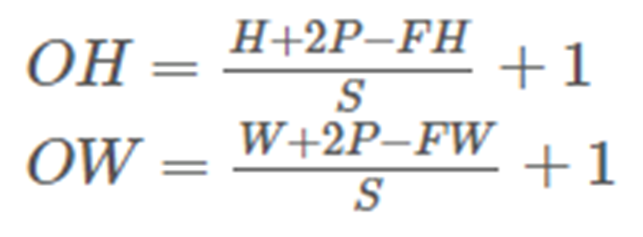

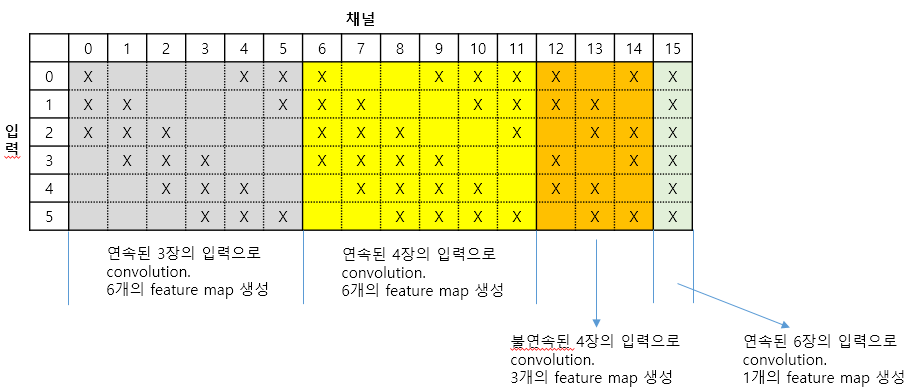

In [ ]:
model.summary()

# cifar-10 CNN

In [ ]:
# 필요한 모듈 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
import pandas as pd

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()
train_x = train_x / 255



# 모델 활용

In [ ]:
# 학습데이터(train_x)로도 분류해보고, 테스트데이터(test_x)로도 분류해 보자.
pred = model.predict(train_x)
pred

In [ ]:
# 예측 값을 판다스 데이터 프레임으로  만들어 보자...
import pandas as pd

df_pred = ?????????
df_pred

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.00,0.00,0.10,0.00,0.23,0.66,0.01,0.00,0.00
1,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.95
2,0.02,0.01,0.06,0.12,0.00,0.03,0.01,0.01,0.01,0.73
3,0.00,0.00,0.01,0.00,0.83,0.00,0.15,0.00,0.00,0.00
4,0.05,0.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...
49995,0.33,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.65,0.01
49996,0.01,0.00,0.25,0.48,0.08,0.06,0.10,0.01,0.00,0.00
49997,0.09,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.79
49998,0.19,0.27,0.00,0.00,0.02,0.00,0.00,0.00,0.44,0.08


In [ ]:
# 정답 데이터(train_y) 출력
train_y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# pred(예측값을 모아놓은 2차원 배열)에서 가장 큰 값의 인덱스 번호를
import numpy as np

pred_arr =
pred_arr

array([6, 9, 9, ..., 9, 8, 1])

In [ ]:
# 정답데이터(train_y)를 2차원 --> 1차원 배열로 만들어 보자.
target_arr = ????????????????????
target_arr

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
# 예측값(pred_arr, 1차원 배열), 정답(target_arr, 1차원을) 을 비교하여 다른(오답)인 인덱스를 뽑아내자.

wrong = ????????????????
wrong

In [ ]:
# cafar10의 번호별 객체

cifar_class = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (1,1))
plt.imshow(train_x[5])
print("예측 :", pred_arr[5])
print("정답 :", target_arr[5])

# 각자 더 성능 좋은 모델로 발전시켜 보기

In [ ]:
# 합성곱 층에서 커널(필터의 수)를 조절, 분류층에서 레이어나 노드 수를 조절해 성능을 개선해 보자...

# 필요한 모듈 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
import pandas as pd

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

train_x = train_x / 255

# 모델을 만들고
model = Sequential()

model.add(Conv2D(??, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(??, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(??, activation='relu'))
model.add(Dense(??, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10)